In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import surp
import arya

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


# Comparing observations
Here, we compare observations from a variety of sources similar to the subgiant sample.
We store each sample as a CSV (processed from the )

In [2]:
subgiants = surp.subgiants
v21 = surp.vincenzo2021()

In [3]:
gso = pd.read_csv("gso_dwarfs.csv")

In [4]:
galah = pd.read_csv("galah_dwarfs.csv")

In [5]:
lamost = pd.read_csv("lamost_dwarfs.csv")

In [6]:
v21["MG_H"] = v21["[mg/h]"]
v21["C_MG"] = v21["[c/mg]"]
v21["FE_H"] = v21["[fe/h]"]
v21["MG_FE"] = v21["[mg/fe]"]

In [7]:
def c_scatter(df, **kwargs):
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(6, 2.5), gridspec_kw={"wspace": 0})
    
    plt.sca(axs[0])
    plt.scatter(df.MG_H, df.C_MG, **kwargs)
    plt.ylabel("[C/Mg]")
    plt.xlabel("[Mg/H]")
    
    plt.sca(axs[1])
    plt.scatter(df.MG_FE, df.C_MG, **kwargs)
    plt.xlabel("[Mg/Fe]")

In [8]:
def fe_scatter(df, **kwargs):
    fig, axs = plt.subplots(1, 2, figsize=(6, 2.5))
    
    plt.sca(axs[0])
    plt.hist2d(df.MG_H, df.MG_FE, **kwargs)
    plt.ylabel("[Mg/Fe]")
    plt.xlabel("[Mg/H]")
    
    plt.sca(axs[1])
    plt.hist(df.FE_H)
    plt.xlabel("[Fe/H]")

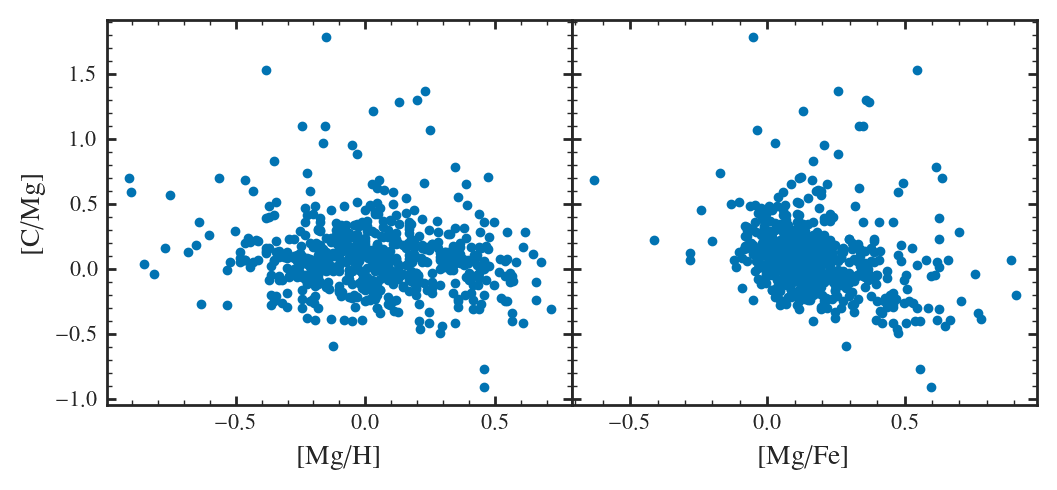

In [9]:
c_scatter(gso)

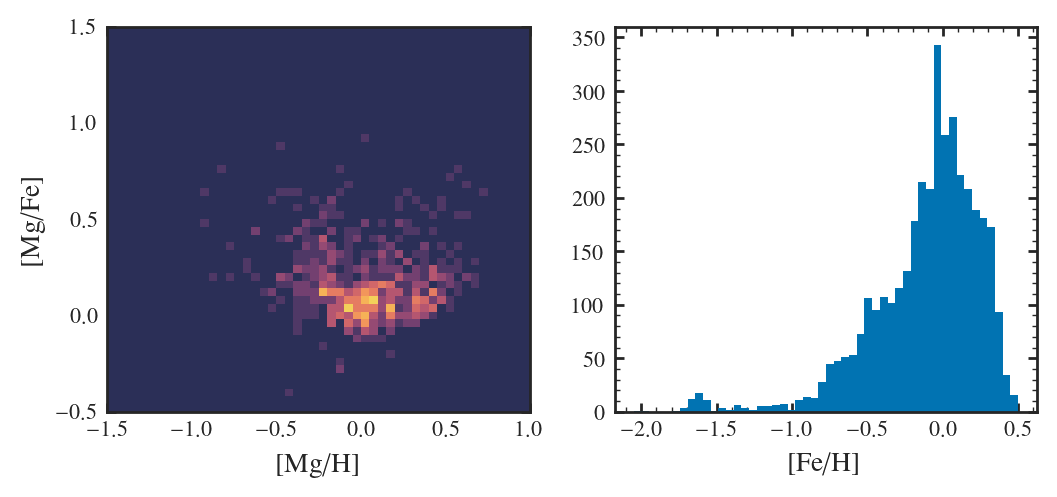

In [10]:
fe_scatter(gso, range=([-1.5, 1], [-0.5, 1.5]), bins=50)

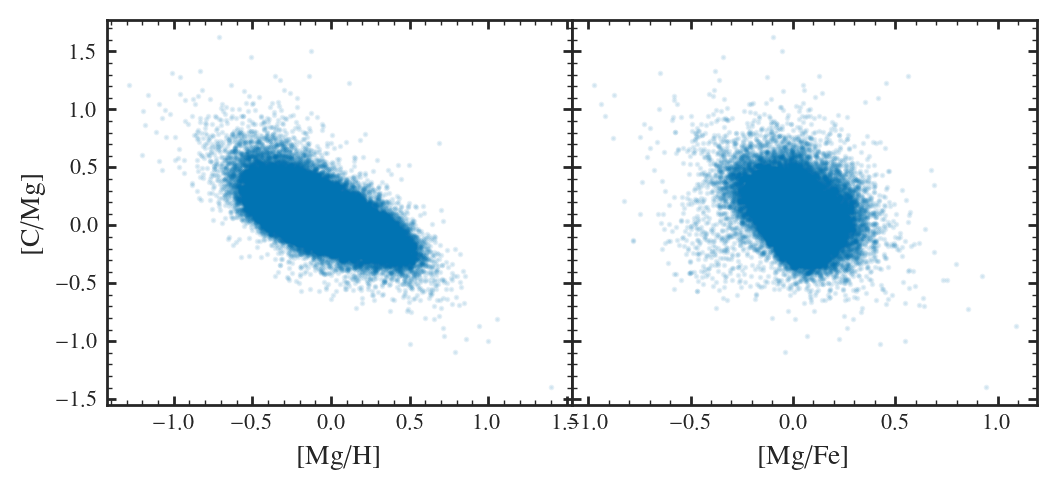

In [11]:
c_scatter(galah, alpha=0.1, s=1)

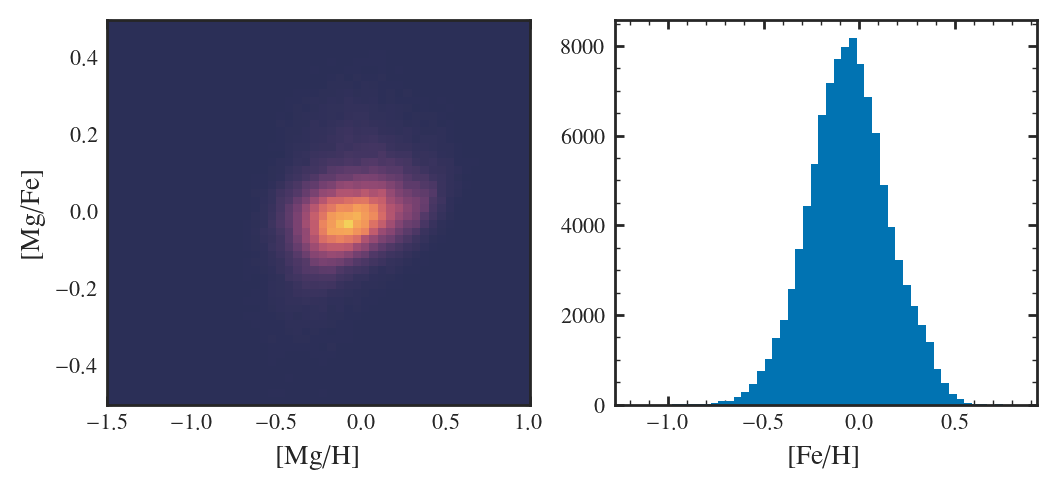

In [12]:
fe_scatter(galah, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

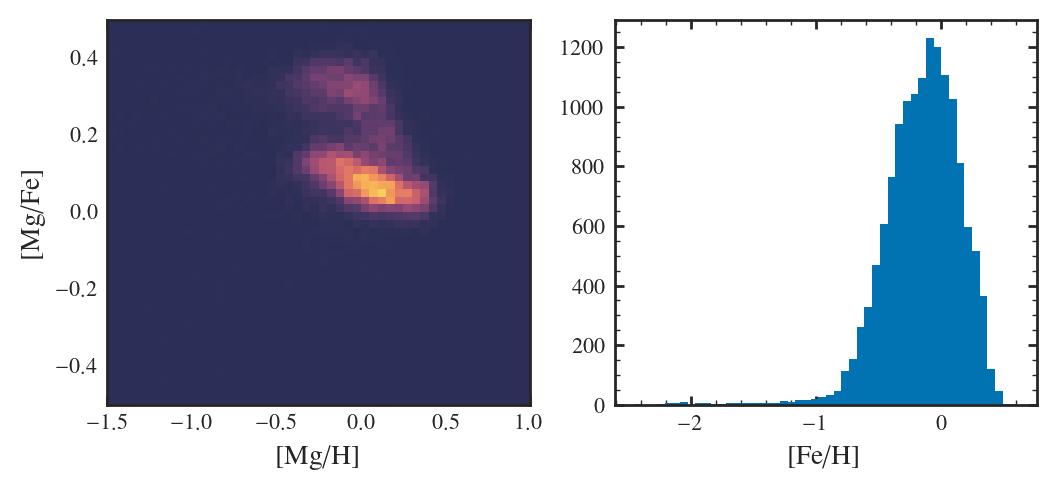

In [13]:
fe_scatter(subgiants, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

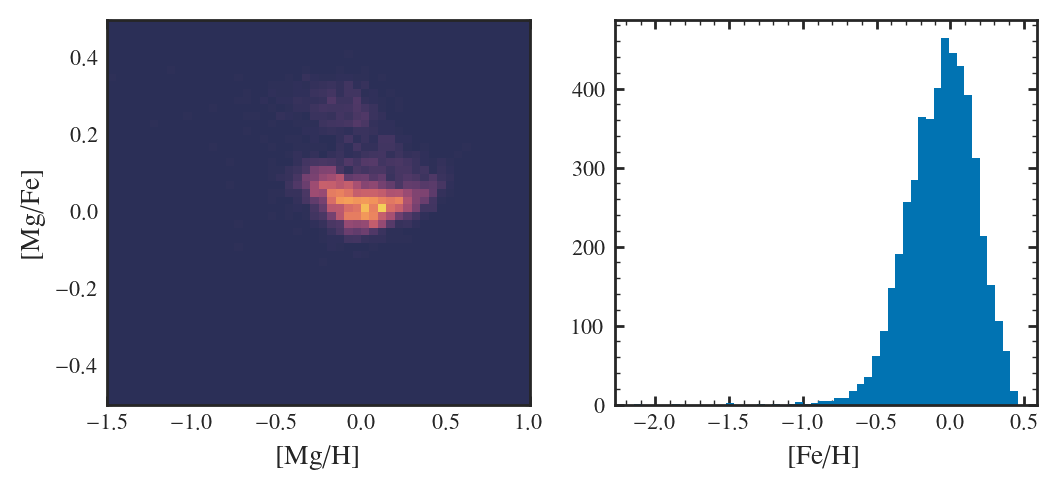

In [14]:
fe_scatter(v21, range=([-1.5, 1], [-0.5, 0.5]), bins=50)

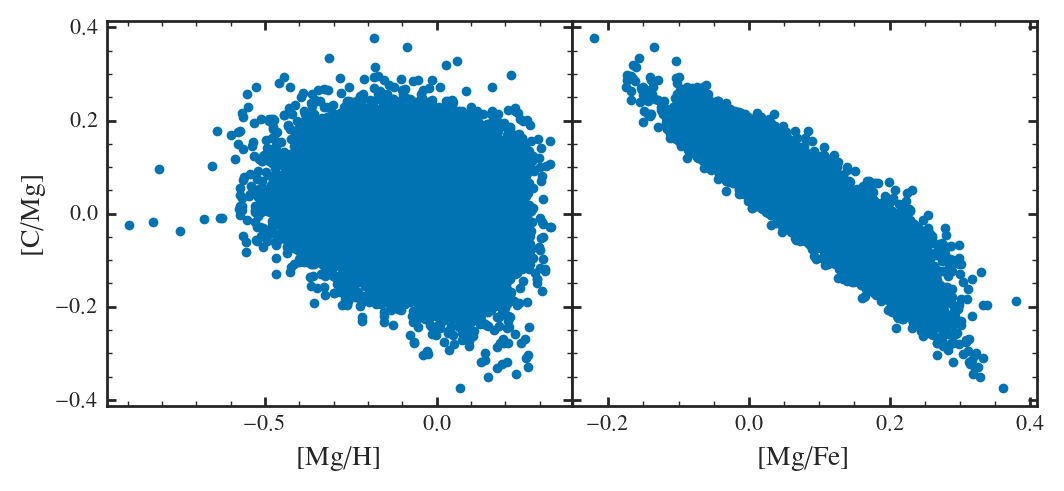

In [15]:
c_scatter(lamost)

In [41]:
gso = gso[np.isfinite(gso.C_MG)]

In [49]:
galah["high_alpha"] = surp.gce_math.is_high_alpha(galah.MG_FE, galah.FE_H)
gso["high_alpha"] = surp.gce_math.is_high_alpha(gso.MG_FE, gso.FE_H)
lamost["high_alpha"] = surp.gce_math.is_high_alpha(lamost.MG_FE, lamost.FE_H)

In [96]:
gso.plot_kwargs = dict(
    label = r"{\it Gaia}--ESO",
    aes="line",
    ms=5,
    binsize=70,
    color = arya.COLORS[3],
    marker = "*"
)

In [79]:
galah.plot_kwargs = dict(
    label = "GALAH",
    aes = "scatter",
    binsize=2000, 
    color=arya.COLORS[2], s=2
)

In [100]:
lamost.plot_kwargs = dict(
    label = "LAMOST",
    aes = "scatter",
    binsize=2000,
    color=arya.COLORS[4], 
    s=2 , 
    marker="^"
)

In [101]:
subgiants.plot_kwargs = dict(
    binsize=300, 
    label="subgiants",
    color=arya.COLORS[0], 
    aes="line"
)

In [102]:
v21.plot_kwargs = dict(
    binsize=300, 
    label="V21",
    color=arya.COLORS[1], 
    aes="line", 
    marker="s"
)

In [103]:
surveys = [subgiants, v21, gso, galah, lamost]

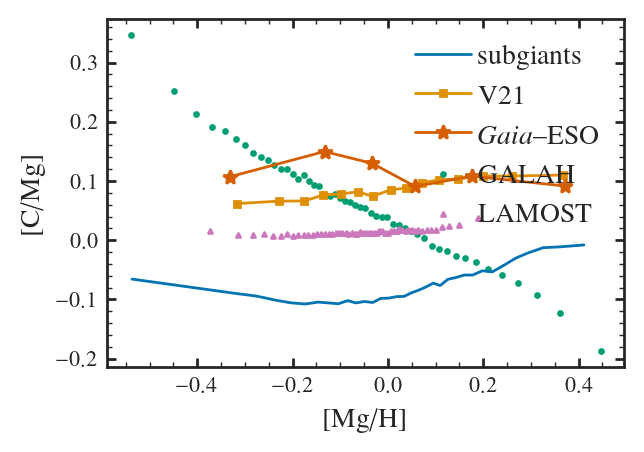

In [98]:
for survey in surveys:
    plot_caah_survey(survey)
    
plt.legend()

In [81]:
def plot_caah_survey(df):
    arya.medianplot(df[~df.high_alpha], "MG_H", "C_MG",errorbar=None, **df.plot_kwargs)
    plt.xlabel("[Mg/H]")
    plt.ylabel("[C/Mg]")

In [104]:
def plot_caafe_survey(df):
    arya.medianplot(df, "MG_FE", "C_MG", errorbar=None, **df.plot_kwargs)

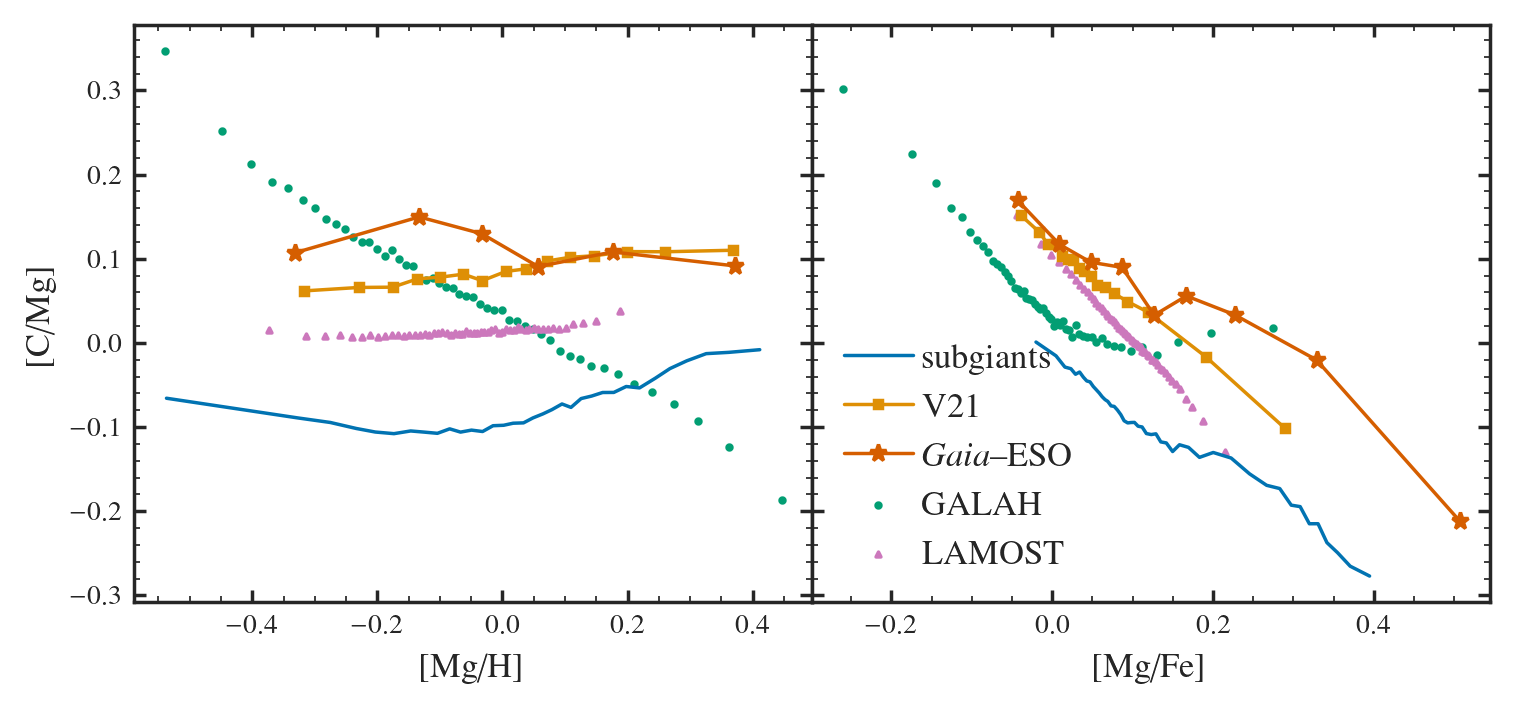

In [106]:

fig, axs = plt.subplots(1, 2, figsize=(7, 3), sharey=True, gridspec_kw={"wspace": 0}, dpi=250)


plt.sca(axs[0])

for survey in surveys:
    plot_caah_survey(survey)
    


plt.sca(axs[1])
for survey in surveys:
    plot_caafe_survey(survey)
    
plt.legend(ncols=1, loc=3)

plt.xlabel("[Mg/Fe]")
plt.savefig("cmg_other_surveys.pdf")
